In [1]:
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

Using TensorFlow backend.


In [2]:
np.random.seed(1337)

args = Namespace(
    encoding_dim = 2,
    input_img = Input(shape=(784,)),  # placeholder, 28 * 28
    epoches = 20,
    batch_size = 256,
    shuffle = True,
)

In [3]:
def load_data():
    (X_train, _), (X_test, y_test) = mnist.load_data()
    
    X_train = X_train.astype('float32') / 255. - 0.5  # normalize
    X_test = X_test.astype('float32') / 255. - 0.5
    X_train = X_train.reshape((X_train.shape[0], -1))
    X_test = X_test.reshape((X_test.shape[0], -1))
    
    print(X_train.shape)
    print(X_test.shape)
    
    return X_train, X_test, y_test

In [4]:
def build_model(args):
    # encoder layers
    encoded = Dense(128, activation='relu')(args.input_img)  # output 128
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(10, activation='relu')(encoded)
    encoder_output = Dense(args.encoding_dim,)(encoded)
    
    # decoder layers
    decoded = Dense(10, activation='relu')(encoder_output)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(784, activation='tanh')(decoded)  # result [-1, 1]
    
    # construct the autoencoder model
    autoencoder = Model(input=args.input_img, output=decoded)
    # construct the encoder model for plotting
    encoder = Model(input=args.input_img, output=encoder_output)
    
    return autoencoder, encoder

In [5]:
X_train, X_test, y_test = load_data()

autoencoder, encoder = build_model(args)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train,
                nb_epoch=args.epoches,
                batch_size=args.batch_size,
                shuffle=args.shuffle)

(60000, 784)
(10000, 784)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/home/texuanw/softwares/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  from ipykernel import kernelapp as app
/home/texuanw/softwares/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/home/texuanw/softwares/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0690
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0546
Epoch 3/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0514
Epoch 4/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0485
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0468
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0457
Epoch 7/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0450
Epoch 8/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.0444
Epoch 9/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0438
Epoch 10/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0434
Epoch 11/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.0430
Epoch 12/20
60000/60000 [===========================

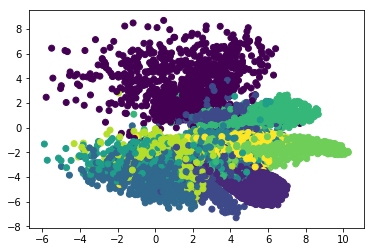

In [6]:
# plotting
encoded_imgs = encoder.predict(X_test)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test)
plt.show()